# Adaptive Linear Neurons

### Adaline was published, only a few years after Frank Rosenblatt's perceptron algorithm, by Bernard Widrow and his doctoral student Tedd Hoff, and can be considered as an improvement on the latter (B. Widrow et al. Adaptive "Adaline" neuron using chemical "memistors". Number Technical Report 1553-2. Stanford Electron. Labs. Stanford, CA, October 1960). The Adaline algorithm is particularly interesting because it illustrates the key concept of defining and minimizing cost functions, which will lay the groundwork for understanding more advanced machine learning algorithms for classification, such as logistic regression and support vector machines, as well as regression models.
Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 33). Packt Publishing. Kindle Edition. 

### The key difference between the Adaline rule (also known as the Widrow-Hoff rule) and Rosenblatt's perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron.
Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 33). Packt Publishing. Kindle Edition.

### One of the key ingredients of supervised machine learning algorithms is to define an objective function that is to be optimized during the learning process. This objective function is often a cost function that we want to minimize. In the case of Adaline, we can define the cost function to learn the weights as the Sum of Squared Errors (SSE) between the calculated outcome and the true class label.

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 34). Packt Publishing. Kindle Edition. 

## Implementing an Adaptive Linear Neuron

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# the perceptron rule and Adaline are similar enough to replicate the perceptron implementation with a
# change to the fit method for the gradient descent minimizing of the cost function weight update

class AdalineGD(object):
    '''
    ADAptive LInear NEuron classifier
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassification in every epoch
    '''
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def fit(self, X, y):
        '''
        Fit training data
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and
            n_features is the number of features
            
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        -------
        self : object
        '''
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
        def activation(self, X):
            '''Compute linear activation'''
            return self.net_input(X)
        
        def predict(self, X):
            '''Return class label after unit step'''
            return np.where(self.activation(X) >= 0.0, 1, -1)

### Instead of updating the weights after evaluating each individual training sample, as in the perceptron, we calculate the gradient based on the whole training dataset via self.eta * errors.sum() for the zero-weight and via self.eta * X.T.dot( errors) for the weights 1 to where X.T.dot( errors) is a matrix-vector multiplication between our feature matrix and the error vector. Similar to the previous perceptron implementation, we collect the cost values in a list self.cost_ to check if the algorithm converged after training.

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 38). Packt Publishing. Kindle Edition. 

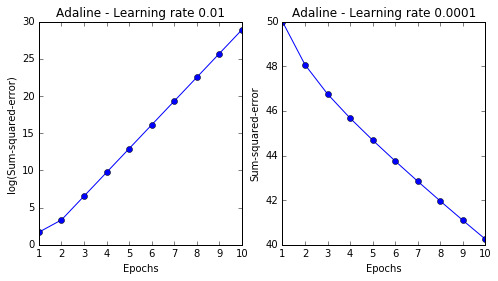

In [27]:
#In practice, it often requires some experimentation to find a good learning rate for optimal convergence.
#So, let's choose two different learning rates and to start with and plot the cost functions versus the 
#number of epochs to see how well the Adaline implementation learns from the training data.
#Raschka, Sebastian (2015-09-23). Python Machine Learning (pp. 38-39). Packt Publishing. Kindle Edition.


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
X=df.iloc[0:100, [0,2]].values

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
adal = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(adal.cost_)+1), np.log10(adal.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

#### The figure on the left shows the result of a too large learning rate - the error increases with each iteration because the learning rate over-shoots the global minimum.  On the right, the result of the minute learning rate produces diminishing error, but the many iterations needed is inefficient.

### Standardization of the Data Set to Normalize Distribution